In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class Connetion(object):
    
    # Make it singltone class.
    def __new__(cls):
        if not hasattr(cls, "instance"): 
             cls.instance = super(Connetion, cls).__new__(cls)
        return cls.instance
    
    def __init__(self):
        
        self.db_filename = 'attractionworld.db'
        self.conn = sqlite3.connect(self.db_filename)
        #self.cursor = self.conn.cursor()
     

    
    
    def cursor(self):
        return self.conn.cursor()

    

conn = Connetion()
cursor = conn.cursor()

In [5]:
def func(pct, allvals):
    
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} visit)".format(pct, absolute)

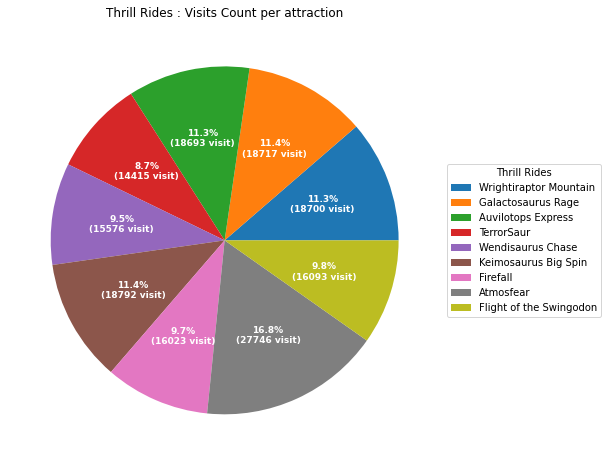

In [6]:
def thrill_rides():
   
    cursor.execute("SELECT AttractionID, Name, Category FROM attraction WHERE Category LIKE '%Thrill Ride%'")
    rows = cursor.fetchall()


    atrr = {'ID': [],
            'Count': [],
            'Name': [] }
    
    for atr in rows:
    
        cursor.execute("SELECT count(attraction) FROM checkin WHERE attraction = '{0}'".format(atr[0]))
        row = cursor.fetchall()

        atrr['ID'].append(atr[0])
        atrr['Count'].append(row[0][0])
        atrr['Name'].append(atr[1])


    df =pd.DataFrame.from_records(atrr, columns=['ID', 'Count','Name'])



    fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(df['Count'], autopct=lambda pct: func(pct, df['Count']),
                                  textprops=dict(color="w"))

    ax.legend(wedges, df['Name'],
          title="Thrill Rides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=9, weight="bold")

    ax.set_title("Thrill Rides : Visits Count per attraction")
    plt.show()

    result = []
    names = atrr['Name']
    count = atrr['Count']

    for i in range(0,len(count)):
        result.append([names[i],count[i]])

thrill_rides()

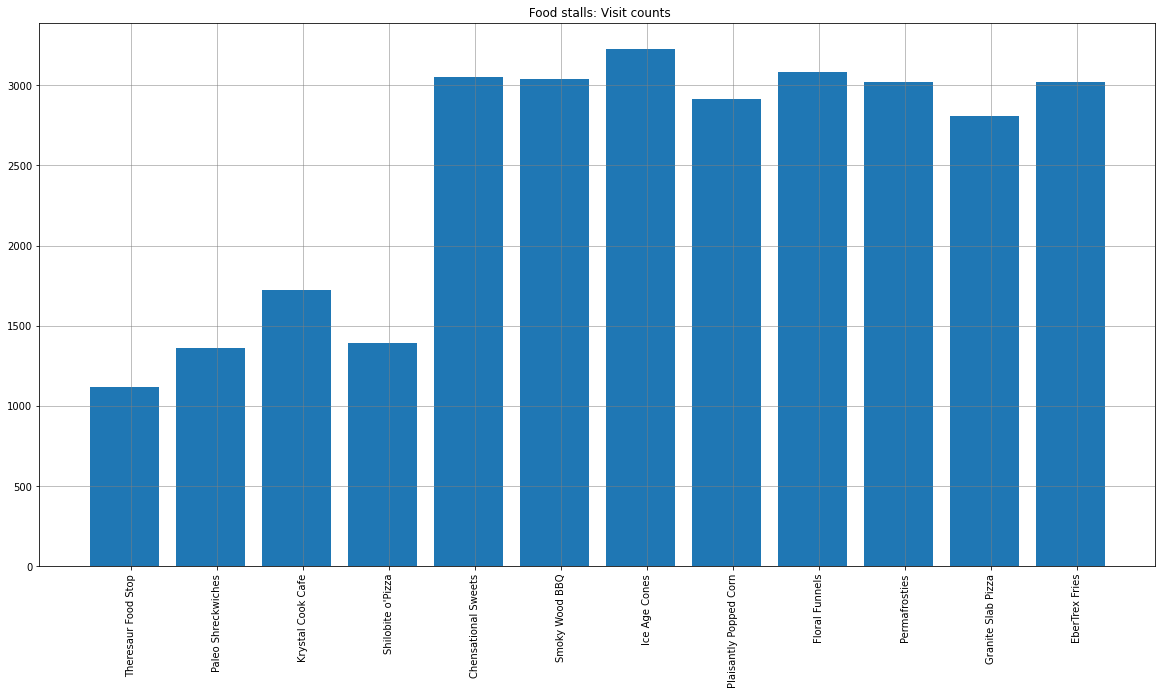

In [11]:
def food_stalls_visits():
    
    cursor.execute("SELECT AttractionID,Name FROM attraction WHERE Category LIKE '%Food%'")
    rows = cursor.fetchall()

    count = 0
    time_sum_in_second = 0
    m_current = float('-inf')
    minv = float("inf")

    food_visit = {'food':[], 'count':[]}
    res = [0,float("inf"),0]

    for r in rows:
    
        cursor.execute("SELECT count(visitorID) FROM checkin where attraction = '{0}'".format(r[0]))
        rows2 = cursor.fetchall()
        food_visit['food'].append(r[1])
        food_visit['count'].append(rows2[0][0])



    result = pd.DataFrame.from_records(food_visit)

    plt.bar(range(len(result['food'])), result['count'], width=0.8)

    barWidth = 0.08


    plt.xticks([r + barWidth for r in range(len(result['food']))],
           result['food'],
           rotation=90)

    plt.title(' Food stalls: Visit counts')

    plt.grid(color='gray', linewidth=0.5)
    
    plt.show()

    result = []
    names = food_visit['food']
    count = food_visit['count']

    for i in range(0,len(count)):
        result.append([names[i],count[i]])

food_stalls_visits()

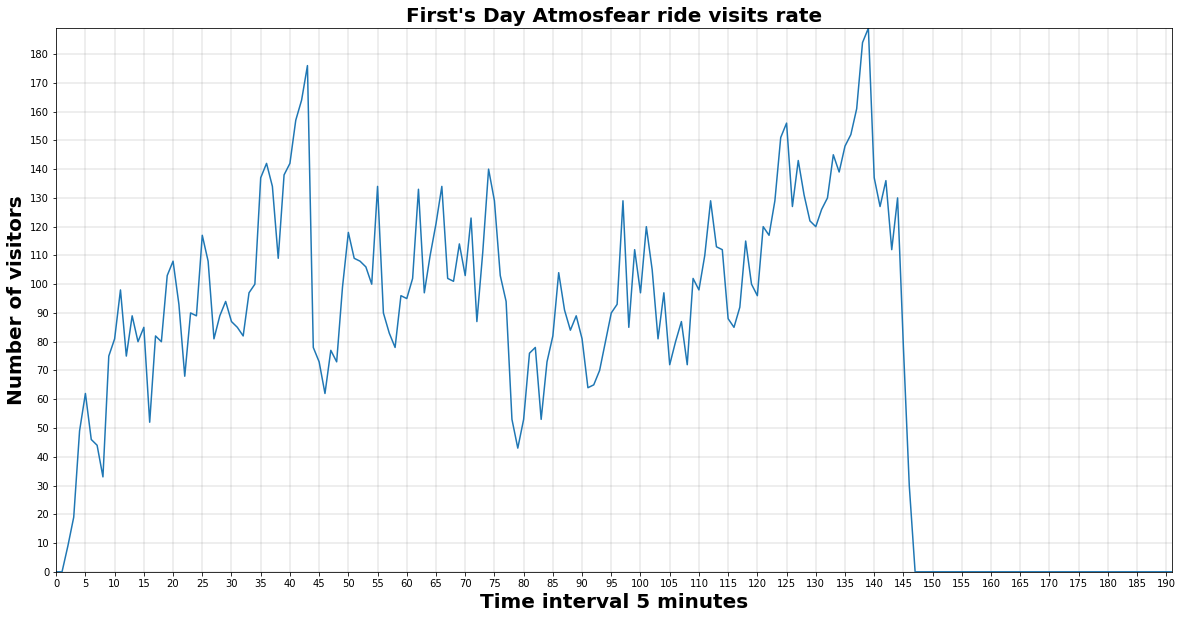

In [10]:
def first_day_atmosfear_ride():
    
    cursor.execute("SELECT AttractionID FROM attraction WHERE Name LIKE '%Atmosfear%'")
    rows = cursor.fetchall()
    Id = int(rows[0][0])
    time = list(range(0,192))
    visits = [0]*192


    cursor.execute("SELECT sequence FROM sequences")

    rows = cursor.fetchall()
    for seq in rows:
        s = seq[0].split("-")[:192]
        count = 0
        for visit in s:
            if int(visit) != 0 and int(visit) == Id:
           
                 visits[count]+=1
            count+=1

    time_series = list(zip(time, visits))




    #visits = visits
    times = time

    plt.plot(times, visits,'-')
    
    plt.xticks(np.arange(0, len(times)+1, 5))
    plt.yticks(np.arange(0, len(visits)+1, 10))
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title('First\'s Day Atmosfear ride visits rate',weight="bold", size=20, color='black')

    plt.xlabel('Time interval 5 minutes',weight="bold", size=20, color='black')
    plt.ylabel('Number of visitors',weight="bold", size=20, color='black')

    plt.grid(color='gray', linewidth=0.26)

    plt.margins(0)

    plt.show()


first_day_atmosfear_ride()

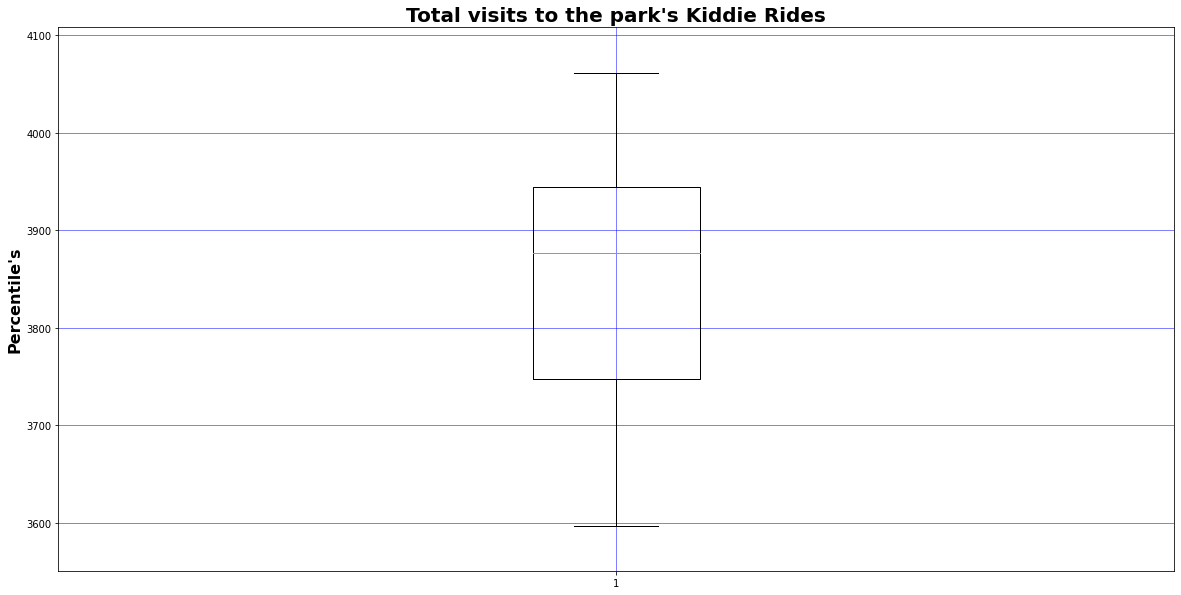

In [9]:
def park_rides_ith():

    cursor.execute("SELECT AttractionID FROM attraction WHERE Category LIKE '%Kiddie Ride%'")
    rows = cursor.fetchall()

    attractions = {"ID":[], "visit":[]}

    for r in rows:
        cursor.execute("SELECT count(visitorID) FROM checkin where attraction = '{0}'".format(r[0]))
        rows2 = cursor.fetchall()
    
        attractions['ID'].append(r[0])
        attractions['visit'].append(rows2[0][0])    


    result = pd.DataFrame.from_records(attractions)

    plt.boxplot(result['visit'], whis=[0,100])
    
    plt.ylabel(("Percentile's"), weight="bold", size=16, color='black')
    
    plt.title("Total visits to the park's Kiddie Rides", weight="bold", size=20, color='black')
    
    plt.grid(color='blue', linewidth=0.5)

    plt.margins(0.1)

    plt.show()

park_rides_ith()